<a href="https://colab.research.google.com/github/AbdullahAlTalaq/AbdullahAlTalaq/blob/main/Gender_Classification_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df=pd.read_csv('gender.csv')

df.head()


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()


long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [10]:
gender_mapping = {'Male': 1, 'Female': 0}
df['gender']=df['gender'].map(gender_mapping)

In [ ]:
df['gender'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5001 entries, 0 to 5000
Series name: gender
Non-Null Count  Dtype
--------------  -----
5001 non-null   int64
dtypes: int64(1)
memory usage: 39.2 KB


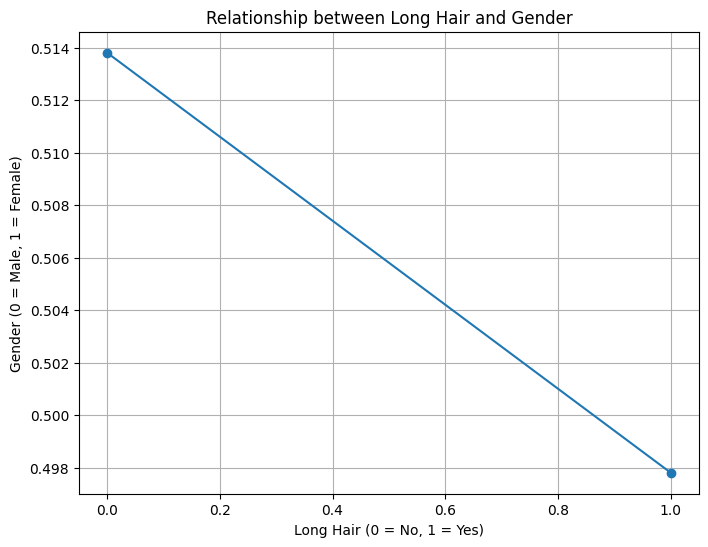

In [ ]:
grouped_data = df.groupby('long_hair')['gender'].mean().reset_index()

# Plot the line
plt.figure(figsize=(8, 6))
plt.plot(grouped_data['long_hair'], grouped_data['gender'], marker='o', linestyle='-')
plt.title('Relationship between Long Hair and Gender')
plt.xlabel('Long Hair (0 = No, 1 = Yes)')
plt.ylabel('Gender (0 = Male, 1 = Female)')
plt.grid(True)
plt.show()

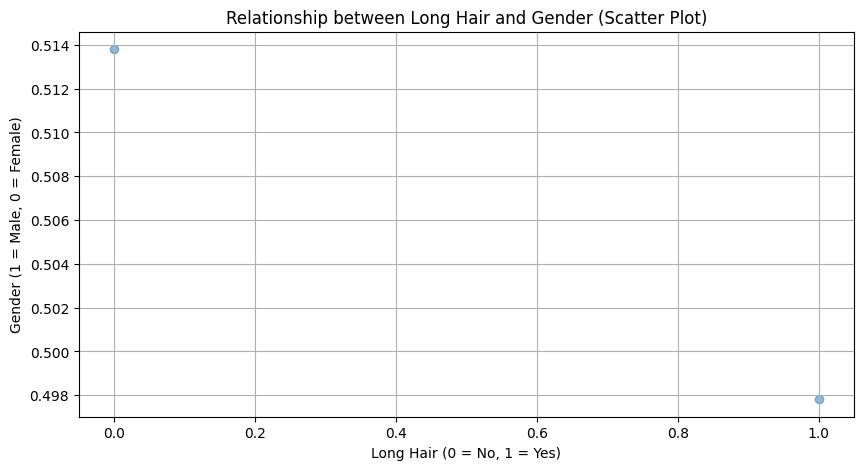

In [ ]:

grouped_data = df.groupby('long_hair')['gender'].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.scatter(grouped_data['long_hair'], grouped_data['gender'], alpha=0.5)
plt.title('Relationship between Long Hair and Gender (Scatter Plot)')
plt.xlabel('Long Hair (0 = No, 1 = Yes)')
plt.ylabel('Gender (1 = Male, 0 = Female)')
plt.grid(True)

plt.show()

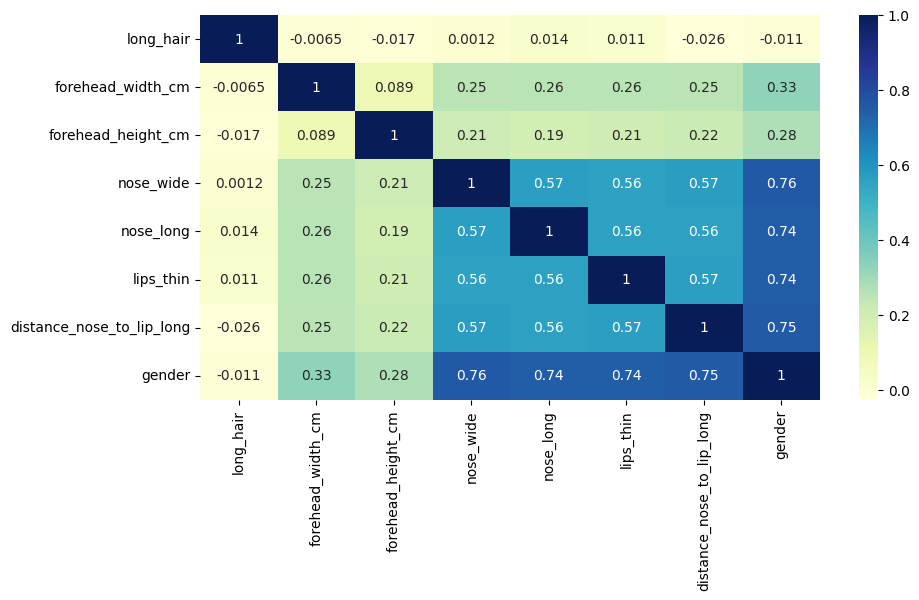

In [ ]:


import seaborn as sns
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(),annot=True, cmap='YlGnBu', cbar=True)
plt.show()

In [11]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


X=df.drop('gender',axis=1)
y= df['gender']

model = LogisticRegression()

n_features_to_select = 4  # Replace with the number of features you want to select
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)

rfe.fit(X,y)
selected_features = X.columns[rfe.support_]
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long'], dtype='object')


In [12]:
df_copy=df
df_copy.drop(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'gender'], axis=1)

,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,0,1,1
1,0,0,1,0
2,1,1,1,1
3,0,1,1,1
4,0,0,0,0
...,...,...,...,...
4996,0,0,0,0
4997,0,0,0,0
4998,0,0,0,0
4999,0,0,0,0


In [13]:
X=df_copy
y= df['gender']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       739
           1       1.00      1.00      1.00       762

    accuracy                           1.00      1501
   macro avg       1.00      1.00      1.00      1501
weighted avg       1.00      1.00      1.00      1501

Confusion Matrix:
[[739   0]
 [  0 762]]


In [29]:
import joblib
joblib.dump(model, 'gender_prediction_model.pkl')

['gender_prediction_model.pkl']

In [50]:

loaded_model = joblib.load('gender_prediction_model.pkl')


long_hair = float(input("Enter 1 for long hair or 0 for not long hair: "))
forehead_width_cm = float(input("Enter forehead width in cm: "))
forehead_height_cm = float(input("Enter forehead height in cm: "))
nose_wide = float(input("Enter 1 for wide nose or 0 for not wide nose: "))
nose_long = float(input("Enter 1 for long nose or 0 for not long nose: "))
lips_thin = float(input("Enter 1 for thin lips or 0 for not thin lips: "))
distance_nose_to_lip_long = float(input("Enter 1 for long distance between nose and lips or 0 for short distance: "))

input_data = [long_hair, forehead_width_cm, forehead_height_cm, nose_wide, nose_long, lips_thin, distance_nose_to_lip_long,0]


input_data = np.array(input_data).reshape(1, -1)


prediction = loaded_model.predict(input_data)


if prediction[0] == 0:
    gender_prediction = "Male"
else:
    gender_prediction = "Female"

print(f"The model predicts that the gender is: {gender_prediction}")



Enter 1 for long hair or 0 for not long hair: 0
Enter forehead width in cm: 13
Enter forehead height in cm: 6
Enter 1 for wide nose or 0 for not wide nose: 1
Enter 1 for long nose or 0 for not long nose: 1
Enter 1 for thin lips or 0 for not thin lips: 1
Enter 1 for long distance between nose and lips or 0 for short distance: 1
The model predicts that the gender is: Female
